
# Machine Learning CM 2604 
## Individual Coursework

**RGU ID:** 2330950

**IIT ID:** 20231631

**Name:** Stephan Nelishka Dabare


**Introduction:**

In this project, I perform a simple classification problem using two machine learning models: a neural network and random forest classification. The objective is to predict whether a client will subscribe to a term deposit. The dataset used for this analysis is the Bank Marketing dataset, which is taken from the UCL Machine Learning Repository.

**Source:** https://archive.ics.uci.edu/dataset/222/bank%2Bmarketing

**About the dataset:**

The data related to marketing campaigns conducted by a Portuguese banking institution. This campaign was based on phone calls, and often required multiple contacts with the same client to determine whether they would subscribe to a term deposit, with a response of either 'yes' or 'no.' There are 4 datasets in that repository. I choose the `bank-full.csv` dataset. `bank-full.csv` contains all examples ordered by date.

**Objective:**

The objective is to predict if the client will subscribe a term deposit using neural network and random forest classification.

### 1. Understanding the dataset

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.python.ops.numpy_ops.np_dtypes import int64

In [3]:
data_frame = pd.read_csv('bank-full.csv', sep=';')

#### 1.1. Preview the dataset:

In [4]:
# get first 5 rows
data_frame.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### 1.2. Get the shape of the dataset:

In [5]:
# Print the number of rows and columns
data_frame.shape

(45211, 17)

**Dataset has:**
* 45211 rows
* 17 columns

#### 1.3. Get summary of the dataset: 

In [6]:
# Get summary of the dataset
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### 1.4. About numerical column data:

In [7]:
# Get summary of numerical columns
data_frame.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### 1.5. About categorical column data:

In [8]:
num = 1
# Iterate through the categorical columns
for col in data_frame.select_dtypes(include='object').columns:
    # Print the categories in each column
    print(str(num) + " " + col + " --> " + str(data_frame[col].unique()))
    num += 1

1 job --> ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
2 marital --> ['married' 'single' 'divorced']
3 education --> ['tertiary' 'secondary' 'unknown' 'primary']
4 default --> ['no' 'yes']
5 housing --> ['yes' 'no']
6 loan --> ['no' 'yes']
7 contact --> ['unknown' 'cellular' 'telephone']
8 month --> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
9 poutcome --> ['unknown' 'failure' 'other' 'success']
10 y --> ['no' 'yes']


**Categorical columns:**
* Nominal:

`job`,`marital`,`education`,`contact`,`month`,`poutcome`

* Binary:

`default`,`housing`,`loan`,`y`

### 2. About Attributes

#### Input variables:

1. `age` : Age of the client (numeric)
2. `job` : Job of client (categorical)
3. `marital` : Marital status (categorical)
4. `education` : Education level (categorical)
5. `default` : Client has credit in default? (categorical)
6. `balance` : Average yearly balance, in euros (numeric)
7. `housing` : Client has housing loan? (categorical)
8. `loan` : Client has personal loan? (categorical)
9. `contact` : Contact communication type with client (categorical)
10. `day` : Last contact day of the month (numeric)
11. `month` : Last contact month (categorical)
12. `duration` : Last contact duration, in seconds (numeric)
13. `campaign` : Number of contacts performed before during this campaign (numeric)
14. `pdays` : Number of days since the client was last contacted (numeric)
15. `previous` : Number of contacts performed before this campaign (numeric)
16. `poutcome` : Outcome of the previous campaign (categorical)

#### Output variable:

17. `y` : Client subscribed a term deposit? (binary: 'yes', 'no')

**Make separate dataframes for numerical and categorical columns**

In [9]:
# Get numerical columns
numerical_columns = data_frame.select_dtypes(include='int64').columns

# Get categorical columns
categorical_columns = data_frame.select_dtypes(include='object').columns

### 3. Exploratory Data Analysis (EDA)

#### 3.1. Select the correct columns

* Select all columns except the last column
* The last column --> target column
* For the entire project all columns are selected, no need to remove.

#### 3.2. Search for missing values

In [10]:
# Handle missing values
missing_value_col = []

# Check each column for missing values
for column in data_frame.columns:
    # If the column has any missing values, add to the list
    if data_frame[column].isnull().sum() > 0:
        missing_value_col.append(column)

    
# If no missing values are found
if not missing_value_col:
    print("No missing value found")
else:
    print("Missing values found in columns: ", missing_value_col)

No missing value found


* No missing values found
* No need to handle missing values

#### 3.3. Find the features with one value

In [11]:
# Iterate through all columns
for column in categorical_columns:
    # If a column has only one unique value
    print(column,data_frame[column].nunique())

job 12
marital 3
education 4
default 2
housing 2
loan 2
contact 3
month 12
poutcome 4
y 2


* There are no single value columns

#### 3.4. Search for duplicate rows

In [12]:
# Check for duplicate rows
print(f"Duplicate rows: {data_frame.duplicated().sum()}")

Duplicate rows: 0


* There are no duplicate rows

#### 3.5. Explore the numerical columns

#### 3.5.1. Search for discrete numerical columns

In [13]:
# Identify discrete numerical columns
discrete_numerical_columns = []

# Iterate through numerical columns
for column in numerical_columns:
    unique_values = data_frame[column].nunique()
    if unique_values < 20:
        discrete_numerical_columns.append(column)
        print(f"{column} has {unique_values} unique values")

# Print the list of discrete numerical columns
print("Discrete numerical columns:", discrete_numerical_columns)


Discrete numerical columns: []


* No discrete columns found

#### 3.5.2. Search for continuous numerical columns

In [14]:
# Identify continuous numerical columns
continuous_columns = []

# Iterate through numerical columns
for column in numerical_columns:
    unique_values = data_frame[column].nunique()
    if unique_values >= 20:
        continuous_columns.append(column)
        print(f"{column} --> {unique_values} unique values")

age --> 77 unique values
balance --> 7168 unique values
day --> 31 unique values
duration --> 1573 unique values
campaign --> 48 unique values
pdays --> 559 unique values
previous --> 41 unique values


#### 3.5.3. Distribution of numerical columns

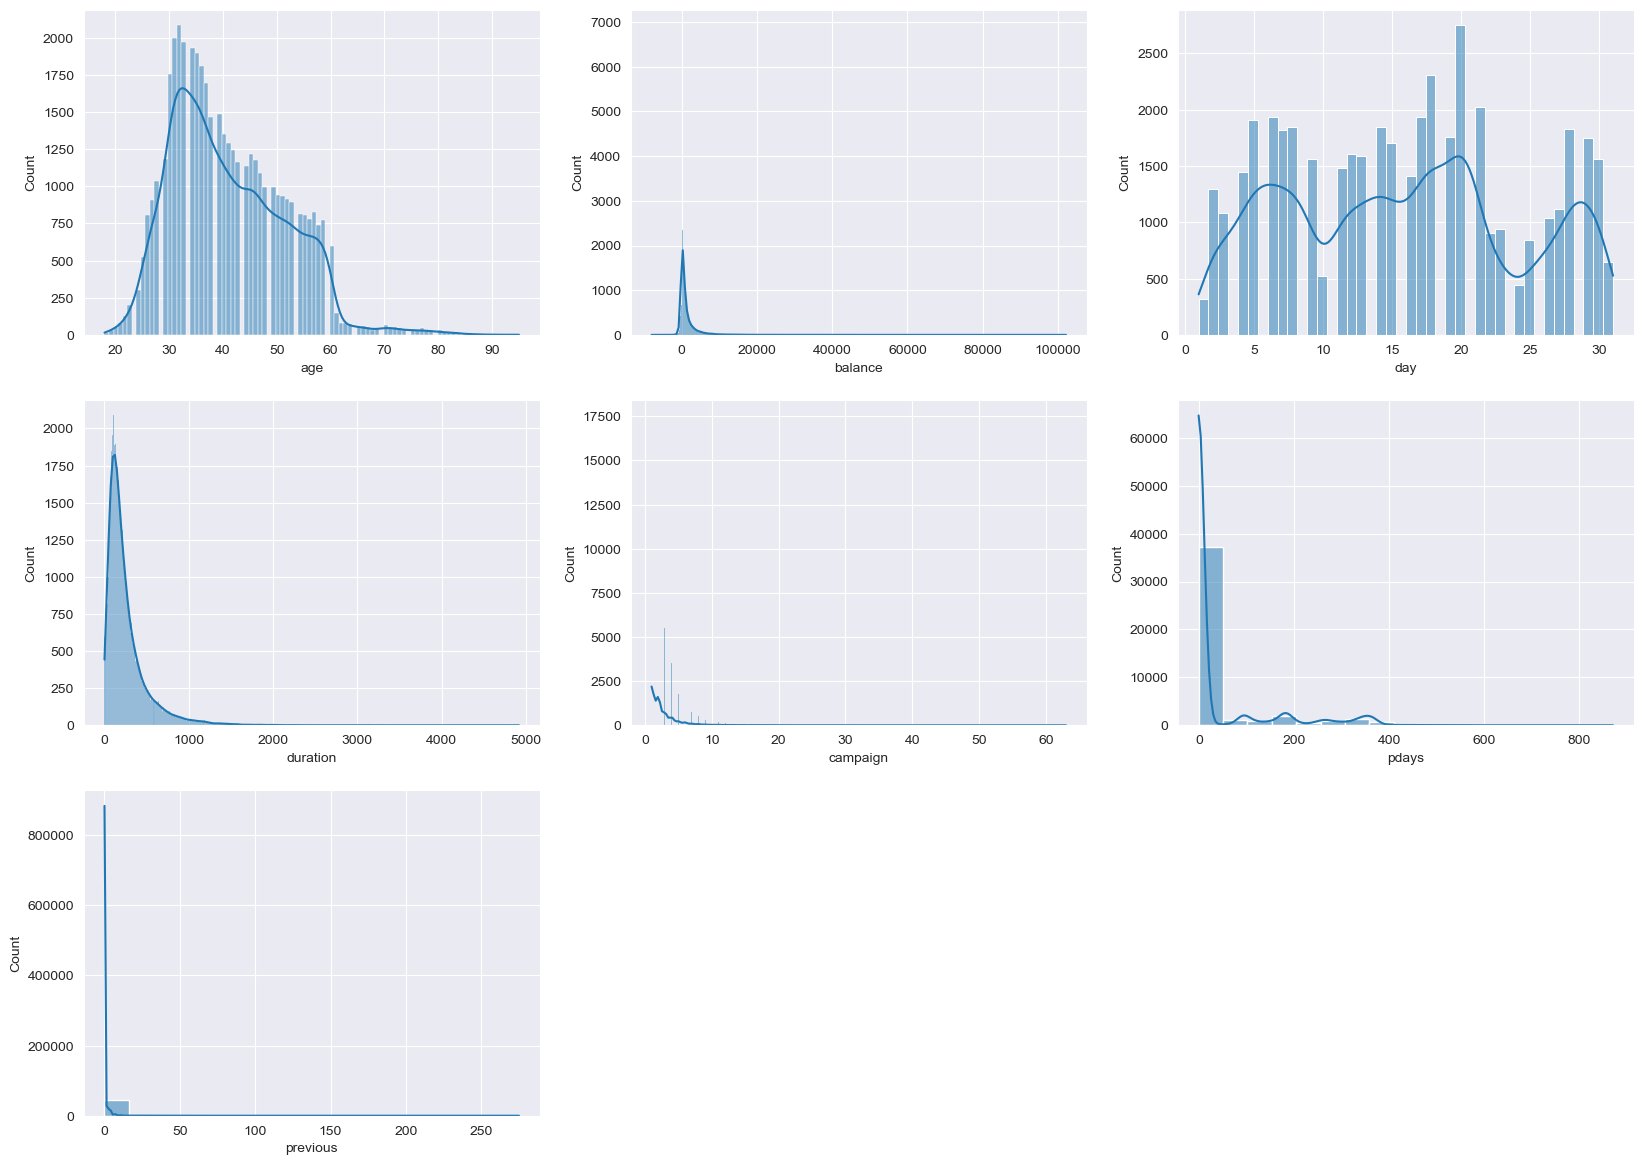

In [15]:
# Plot the distribution of numerical columns
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for feature in continuous_columns:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(data_frame[feature], kde=True)
    plt.xlabel(feature)
    plotnumber += 1
plt.show()

**According to the plots:**
* `age`, `day` is normally distributed.
* `balance`, `duration`, `campaign`, `pdays`, `previous` are left skewed.
* There should be some outliers.

#### 3.6. Get the correlation between numerical columns

**Correlation of all numerical data and target variable**
* With `y` column shows how the numerical columns are correlated with the target variable.

<Axes: >

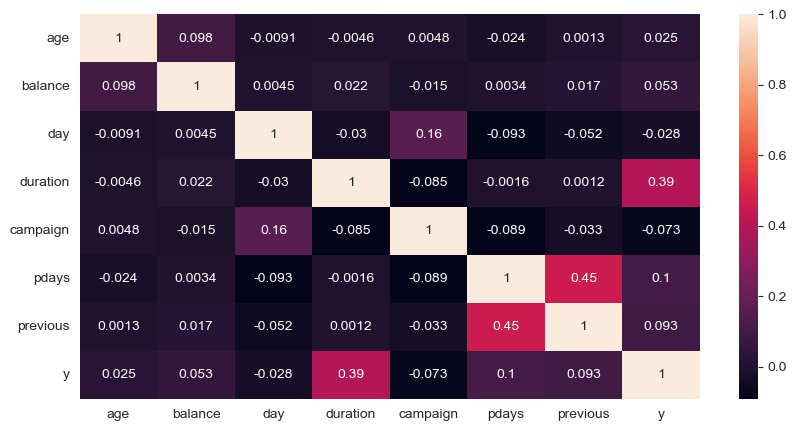

In [16]:
# Get the correlations of numerical columns
from sklearn.preprocessing import LabelEncoder

data_frame_corr = data_frame.copy()

leEn = LabelEncoder()
data_frame_corr['y'] = leEn.fit_transform(data_frame_corr['y'])

num_data_frame = data_frame_corr.select_dtypes(include='int64')
correlation = num_data_frame.corr()
fig = plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True)

**According to the correlation matrix:**
* No any strong correlation between any features.

#### 3.7. Examine the target variable

In [17]:
# Distribution of target variable --> y (subscribed deposit or not)
print(data_frame['y'].value_counts())

y
no     39922
yes     5289
Name: count, dtype: int64


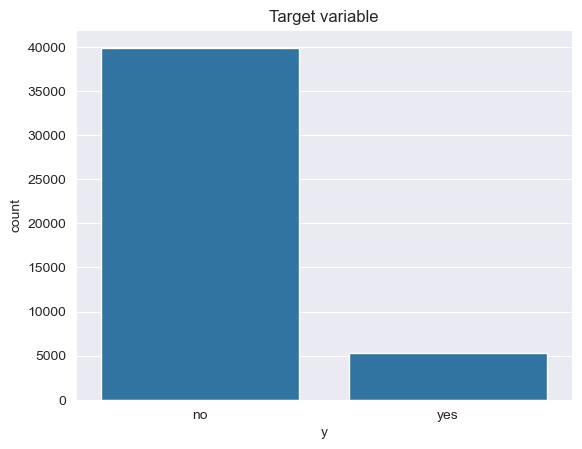

<Axes: ylabel='count'>

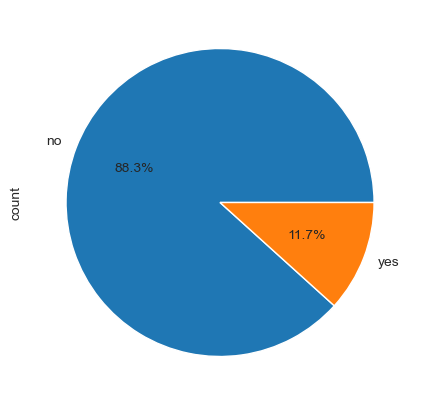

In [18]:
# Plot the distribution of the target variable
sns.countplot(x='y', data=data_frame)
plt.title('Target variable')
plt.show()

# Show pie plot 
plt.figure(figsize=(5,5))
data_frame['y'].value_counts().plot.pie(autopct='%1.1f%%')

### 4. Feature Engineering

**Selected features:**
* Numerical: `age`, `balance`, `duration`, `campaign`, `pdays`, `previous`, `day`
* Categorical: `job`, `marital`, `education`, `contact`, `month`, `poutcome`, `default`, `housing`, `loan`
* Target variable: `y`

#### 4.2. Detecting and handling outliers in numerical features

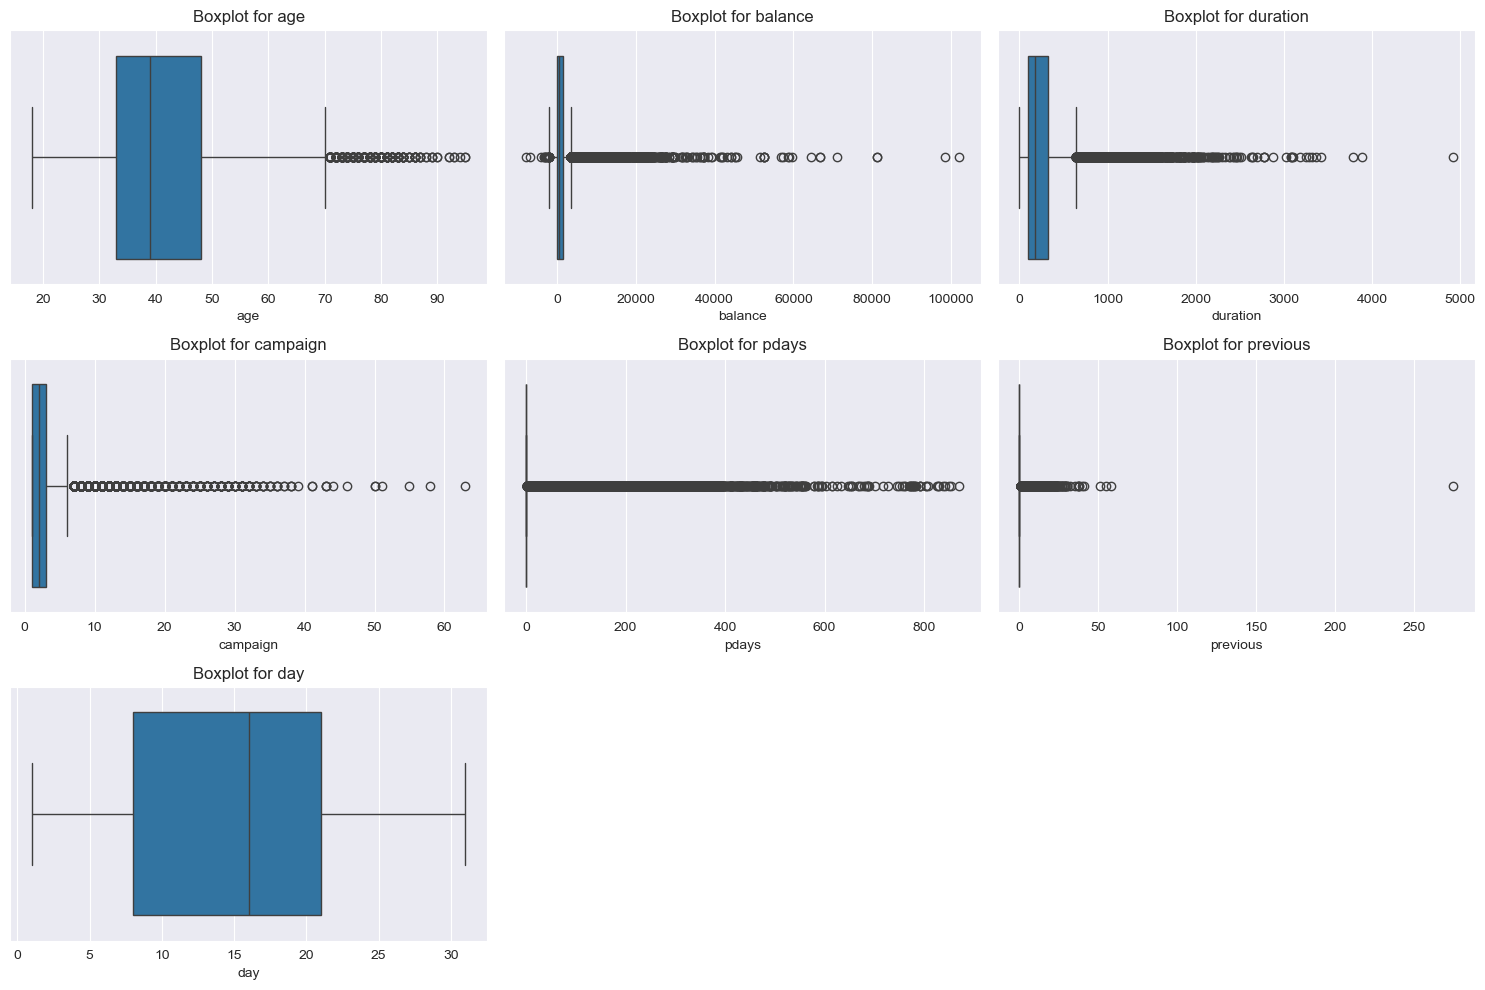

In [19]:
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']

data_frame_1 = data_frame.copy()

# Box plots for all numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data_frame_1[col])
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

**According to the box plots:**
* `age`, `balance`, `duration`, `campaign`, `pdays`, `previous` columns have outliers.

**Handling outliers:**
* Method: Winsorization
* Winsorization --> A statistical technique that reduces the impact of outliers in data by replacing extreme values with values from a selected percentile range. (2020, GeeksforGeeks)

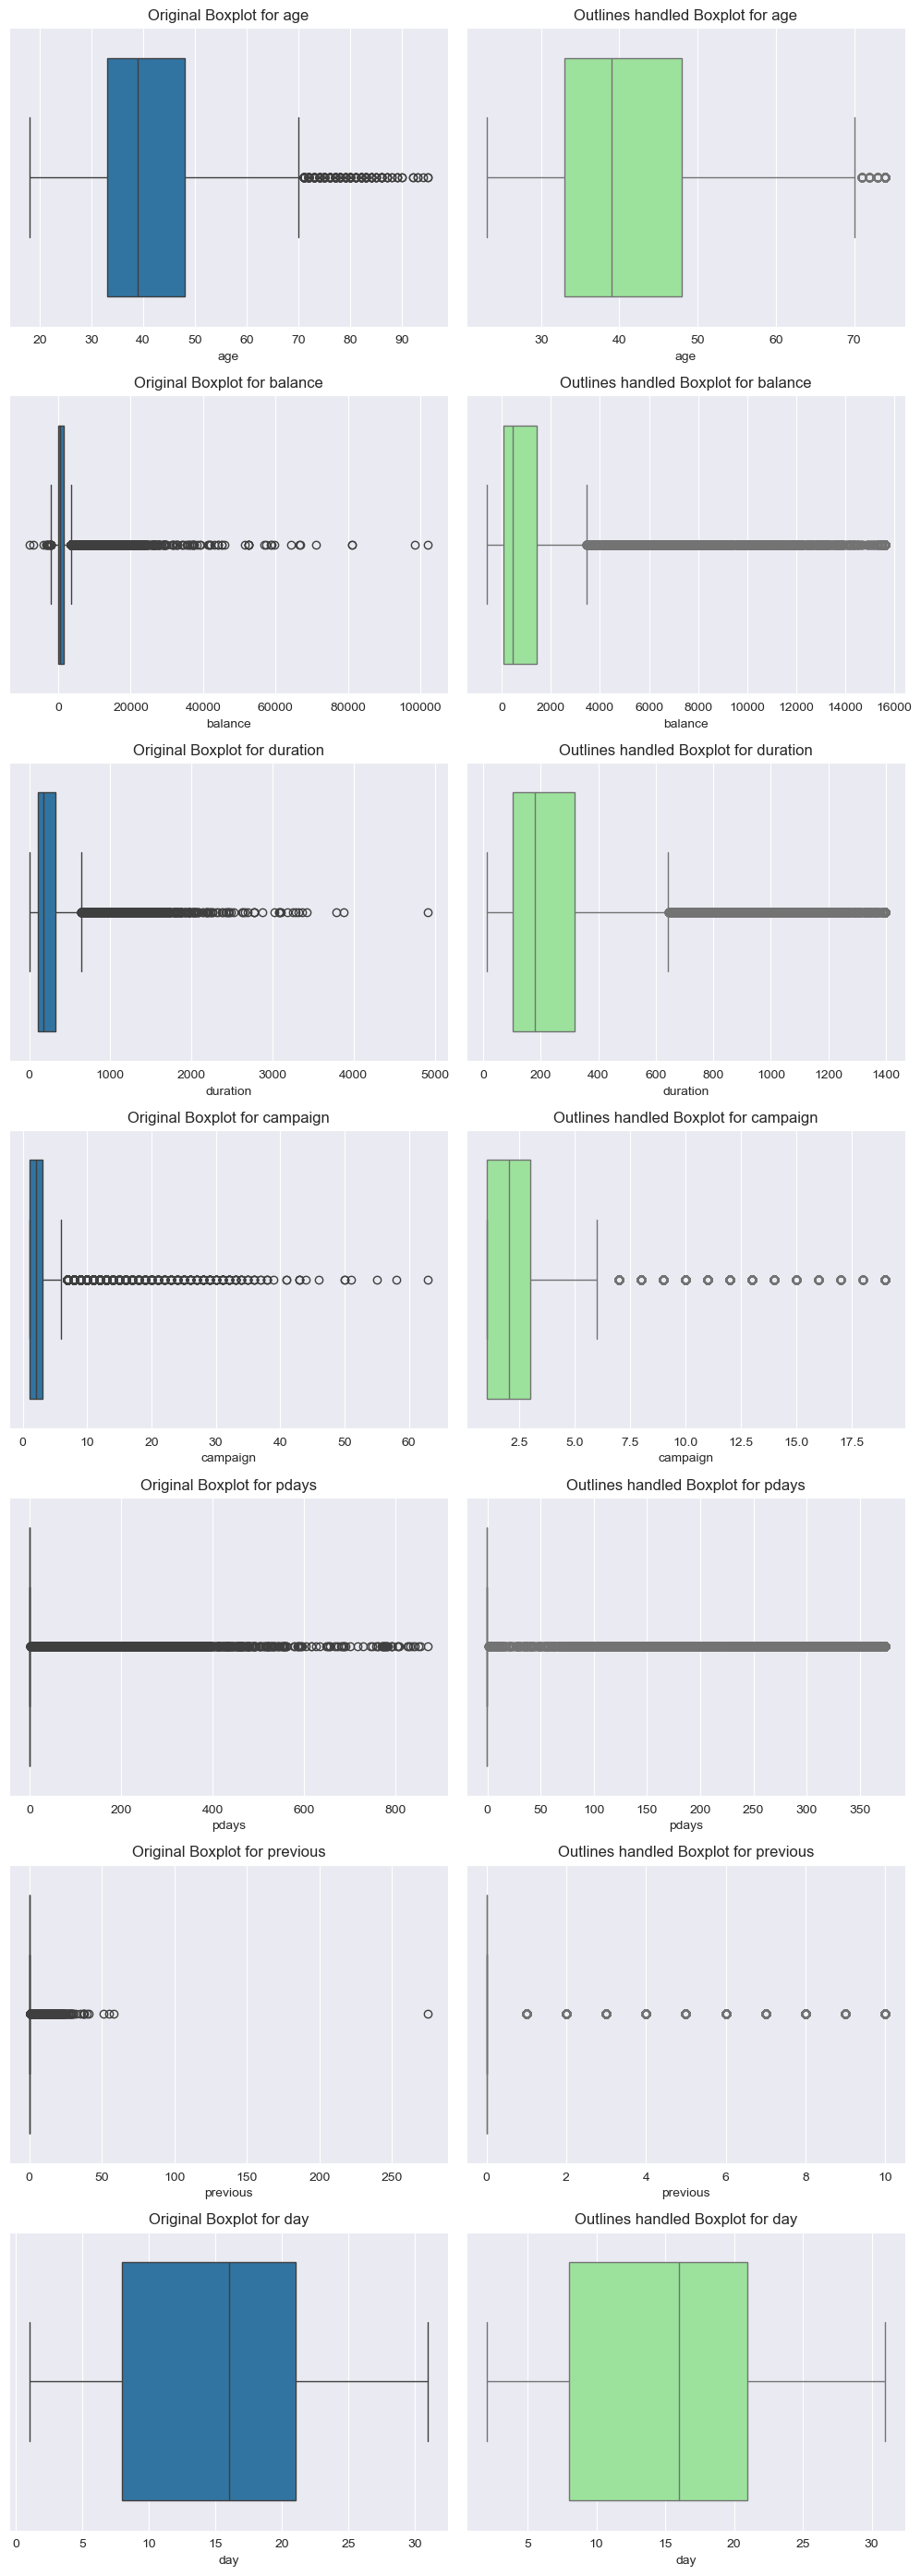

In [20]:
# Replacing extreme values method
def winsorization(column, lower_percentile = 1, upper_percentile = 99.3):
    lower_cutoff = np.percentile(column, lower_percentile)
    upper_cutoff = np.percentile(column, upper_percentile)
    return np.clip(column, lower_cutoff, upper_cutoff)

# Apply Winsorization to the numerical columns only
data_frame_win = data_frame_1.copy()

for col in numerical_columns:
    data_frame_win[col] = winsorization(data_frame_1[col])

# Plot box plots for each column in original and Winsorized DataFrames
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(10, 4 * len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    # Box plot without handling outliers
    sns.boxplot(data=data_frame_1, x=col, ax=axes[i, 0])
    axes[i, 0].set_title(f"Original Boxplot for {col}")

    # Box plot after handling outliers
    sns.boxplot(data=data_frame_win, x=col, ax=axes[i, 1], color="lightgreen")
    axes[i, 1].set_title(f"Outlines handled Boxplot for {col}")

# Layout
plt.tight_layout()
plt.show()

In [21]:
data_frame_win.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 5.9+ MB


#### 4.3. Numerical feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
data_frame_2 = data_frame_win.copy()
scaler = StandardScaler()
num_features_scaling = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']
data_frame_2[num_features_scaling] = scaler.fit_transform(data_frame_2[num_features_scaling])


In [24]:
data_frame_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.633368,management,married,tertiary,no,0.356818,yes,no,unknown,-1.301248,may,0.023058,-0.629433,-0.419644,-0.353024,unknown,no
1,0.295081,technician,single,secondary,no,-0.536665,yes,no,unknown,-1.301248,may,-0.435769,-0.629433,-0.419644,-0.353024,unknown,no
2,-0.756430,entrepreneur,married,secondary,no,-0.548076,yes,yes,unknown,-1.301248,may,-0.748605,-0.629433,-0.419644,-0.353024,unknown,no
3,0.581857,blue-collar,married,unknown,no,0.087590,yes,no,unknown,-1.301248,may,-0.681867,-0.629433,-0.419644,-0.353024,unknown,no
4,-0.756430,unknown,single,unknown,no,-0.548499,no,no,unknown,-1.301248,may,-0.239725,-0.629433,-0.419644,-0.353024,unknown,no


In [25]:
data_frame_win.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.913118,1298.760723,15.813541,255.472009,2.717148,39.344452,0.533675
std,10.461250,2366.048110,8.310221,239.744539,2.728117,96.140814,1.511743
min,23.000000,-627.000000,2.000000,11.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,74.000000,15632.590000,31.000000,1398.060000,19.000000,374.000000,10.000000


In [26]:
data_frame_2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,-2.866625e-16,1.005833e-16,6.915105e-17,-5.029167e-18,-5.532084e-17,1.005833e-16,1.005833e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-1.712350e+00,-8.139234e-01,-1.662254e+00,-1.019730e+00,-6.294333e-01,-4.196438e-01,-3.530238e-01
25%,-7.564303e-01,-5.184908e-01,-9.402431e-01,-6.359840e-01,-6.294333e-01,-4.196438e-01,-3.530238e-01
50%,-1.828787e-01,-3.595743e-01,2.243756e-02,-3.148053e-01,-2.628760e-01,-4.196438e-01,-3.530238e-01
75%,6.774487e-01,5.462303e-02,6.241130e-01,2.649849e-01,1.036813e-01,-4.196438e-01,-3.530238e-01
max,3.162839e+00,6.058198e+00,1.827464e+00,4.765909e+00,5.968598e+00,3.480928e+00,6.261929e+00


#### 4.1. Encoding categorical columns

In [27]:
for feature in categorical_columns:
    print(feature,len(data_frame_2[feature].unique()))

job 12
marital 3
education 4
default 2
housing 2
loan 2
contact 3
month 12
poutcome 4
y 2


**Categorical columns:**
* Nominal:

`job`,`marital`,`education`,`contact`,`month`,`poutcome`

* Binary:

`default`,`housing`,`loan`,`y`

**Encoding:**
* Nominal columns will be one-hot encoded
* Binary columns will be label encoded

#### 4.2.1. Label encoding binary columns

In [28]:
from sklearn.preprocessing import LabelEncoder

data_frame_3 = data_frame_2.copy()

le = LabelEncoder()
label_encoded_col = ['y', 'loan', 'housing', 'default']
for col in label_encoded_col:
    data_frame_3[col] = le.fit_transform(data_frame_3[col])  # 'yes' -> 1, 'no' -> 0

#### 4.2.2. One-hot encoding nominal columns

In [29]:
# dummy encode categorical columns
categorical_columns_new = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
data_frame_3 = pd.get_dummies(data_frame_3, columns=categorical_columns_new, drop_first=False)

# Convert all boolean columns to 1 and 0
bool_columns = data_frame_3.select_dtypes(include='bool').columns
data_frame_3[bool_columns] = data_frame_3[bool_columns].astype(int)

# Check the head after encoding
data_frame_3.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.633368,0,0.356818,1,0,-1.301248,0.023058,-0.629433,-0.419644,-0.353024,...,0,0,1,0,0,0,0,0,0,1
1,0.295081,0,-0.536665,1,0,-1.301248,-0.435769,-0.629433,-0.419644,-0.353024,...,0,0,1,0,0,0,0,0,0,1
2,-0.756430,0,-0.548076,1,1,-1.301248,-0.748605,-0.629433,-0.419644,-0.353024,...,0,0,1,0,0,0,0,0,0,1
3,0.581857,0,0.087590,1,0,-1.301248,-0.681867,-0.629433,-0.419644,-0.353024,...,0,0,1,0,0,0,0,0,0,1
4,-0.756430,0,-0.548499,0,0,-1.301248,-0.239725,-0.629433,-0.419644,-0.353024,...,0,0,1,0,0,0,0,0,0,1


In [30]:
data_frame_4 = data_frame_3.copy()

# drop pday column
data_frame_4 = data_frame_4.drop('pdays', axis=1)

In [31]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Assume `data_frame` is the preprocessed dataframe and 'Y' is the target column.
X = data_frame_4.drop(columns=['y'])  # Features
y = data_frame_4['y']  # Target

# Step 1: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [32]:
# Step 2: Balance the training dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

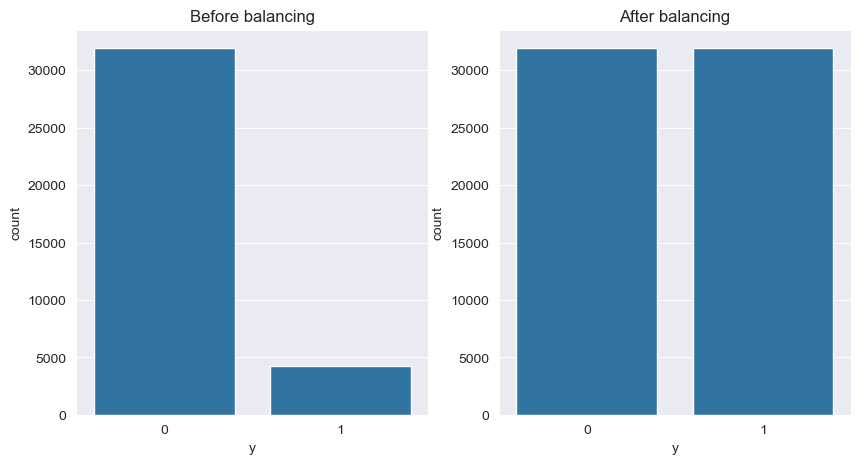

In [33]:
# Before balancing and after balancing bar chart
plt.figure(figsize=(10, 5))

# Before balancing
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Before balancing')

# After balancing
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_balanced)
plt.title('After balancing')

plt.show()

In [45]:
# Print the training y values

print(y_train_balanced.value_counts())

y
0    31937
1    31937
Name: count, dtype: int64


In [34]:
len(X_train_balanced)

63874

In [35]:
len(X_test)

9043

In [36]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[7473  512]
 [ 420  638]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7985
           1       0.55      0.60      0.58      1058

    accuracy                           0.90      9043
   macro avg       0.75      0.77      0.76      9043
weighted avg       0.90      0.90      0.90      9043


Accuracy Score:
0.8969368572376424


In [37]:
# # Import necessary libraries
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# 
# # Initialize the Random Forest Classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# 
# # Train the model
# rf_classifier.fit(X_train, y_train)
# 
# # Make predictions on the test set
# y_pred = rf_classifier.predict(X_test)
# 
# # Evaluate the model
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))
# 
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))
# 
# print("\nAccuracy Score:")
# print(accuracy_score(y_test, y_pred))

In [38]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data_frame_5 = data_frame_3.copy()

# List of numerical features to normalize
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalize numerical features
normalized_data = pd.DataFrame(min_max_scaler.fit_transform(data_frame_5[numerical_features]), 
                                columns=numerical_features)

# Add normalized features back to the original dataset
data_normalized = data_frame_5.copy()
for feature in numerical_features:
    data_normalized[feature] = normalized_data[feature]

# Display the first few rows of the normalized dataset
print("\nDataset with Normalized Numerical Features:")
display(data_normalized.head())



Dataset with Normalized Numerical Features:


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.686275,0,0.170361,1,0,0.103448,0.180237,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
1,0.411765,0,0.040345,1,0,0.103448,0.100933,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
2,0.196078,0,0.038685,1,1,0.103448,0.046862,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
3,0.470588,0,0.131184,1,0,0.103448,0.058397,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,0.196078,0,0.038623,0,0,0.103448,0.134818,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1


In [39]:
import tensorflow as tf
import numpy as np

In [40]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Assume `data_frame` is the preprocessed dataframe and 'Y' is the target column.
X = data_normalized.drop(columns=['y'])  # Features
y = data_normalized['y']  # Target

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)


In [41]:

# Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(64, activation='relu'),      # First hidden layer
    tf.keras.layers.Dense(32, activation='relu'),      # Second hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')     # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs=20,
                    batch_size=32)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")


Epoch 1/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - accuracy: 0.8605 - loss: 0.3310 - val_accuracy: 0.9050 - val_loss: 0.2210
Epoch 2/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.9020 - loss: 0.2245 - val_accuracy: 0.9042 - val_loss: 0.2121
Epoch 3/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.9066 - loss: 0.2105 - val_accuracy: 0.9045 - val_loss: 0.2101
Epoch 4/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.9094 - loss: 0.2040 - val_accuracy: 0.9041 - val_loss: 0.2070
Epoch 5/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.9084 - loss: 0.2063 - val_accuracy: 0.9072 - val_loss: 0.2034
Epoch 6/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.9100 - loss: 0.1978 - val_accuracy: 0.9068 - val_loss: 0.2036
Epoch 7/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.9100 - loss: 0.1950 - val_accuracy: 0.9064 - val_loss: 0.2043
Epoch 8/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.9100 - loss: 0.1949 - 